# Exploración de los datos de las categorías de criptomonedas

## Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
3. [Distribución y relación de los datos](#id3)


## 1. Descripción de los datos

In [1]:
# se importa las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/categorias.csv', delimiter=',')

In [3]:
df.head()

,Unnamed: 0,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at
0,0,layer-1,Layer 1 (L1),7.889016e+11,-1.406792,NaN,['https://assets.coingecko.com/coins/images/1/...,1.826987e+10,2023-08-25T23:10:25.431Z
1,1,smart-contract-platform,Smart Contract Platform,3.051210e+11,-1.409583,Smart contract platforms are usually blockchai...,['https://assets.coingecko.com/coins/images/27...,1.002859e+10,2023-08-25T23:15:04.884Z
2,2,stablecoins,Stablecoins,1.242245e+11,0.181809,NaN,['https://assets.coingecko.com/coins/images/32...,2.104310e+10,2023-08-25T23:15:04.636Z
3,3,alleged-sec-securities,Alleged SEC Securities,8.258470e+10,-1.158269,Tokens and cryptocurrencies alleged to be secu...,['https://assets.coingecko.com/coins/images/82...,2.554525e+09,2023-08-25T23:15:03.007Z
4,4,exchange-based-tokens,Exchange-based Tokens,5.303521e+10,-0.309808,These tokens are normally associated with both...,['https://assets.coingecko.com/coins/images/82...,9.242519e+08,2023-08-25T23:15:06.393Z


In [27]:
# se averigua cúantos registros hay: 116 registros
df.shape[0]

116

In [32]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'market_cap', 'market_cap_change_24h',
       'content', 'top_3_coins', 'volume_24h', 'updated_at'],
      dtype='object')

In [5]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# También se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             116 non-null    int64  
 1   id                     116 non-null    object 
 2   name                   116 non-null    object 
 3   market_cap             76 non-null     float64
 4   market_cap_change_24h  76 non-null     float64
 5   content                45 non-null     object 
 6   top_3_coins            116 non-null    object 
 7   volume_24h             76 non-null     float64
 8   updated_at             113 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 8.3+ KB


In [6]:
df.describe()

,Unnamed: 0,market_cap,market_cap_change_24h,volume_24h
count,116.000000,7.600000e+01,76.000000,7.600000e+01
mean,57.500000,2.154527e+10,-1.798666,2.748091e+09
std,33.630343,9.735213e+10,2.751510,8.623255e+09
min,0.000000,0.000000e+00,-12.281712,4.828139e+03
25%,28.750000,2.305157e+08,-2.713029,7.463919e+06
50%,57.500000,1.086403e+09,-1.633370,6.120738e+07
75%,86.250000,5.555152e+09,-0.371870,4.138063e+08
max,115.000000,7.889016e+11,12.926994,3.704039e+10


Se observa que hay categorias que no tienen market_cap registrado

In [7]:
# se averigua si hay nulos --> no hay nulos.
df[df.duplicated(keep=False)]

,Unnamed: 0,id,name,market_cap,market_cap_change_24h,content,top_3_coins,volume_24h,updated_at


Se averigua la tendencia de las categorias en las criptomonedas segun su capitalización en el mercado:

In [14]:
df_ordenado_precio = df.sort_values(by='market_cap', ascending=False)

top_5 = df_ordenado_precio.head(5)

print(top_5)

   Unnamed: 0                       id                     name    market_cap  \
0           0                  layer-1             Layer 1 (L1)  7.889016e+11   
1           1  smart-contract-platform  Smart Contract Platform  3.051210e+11   
2           2              stablecoins              Stablecoins  1.242245e+11   
3           3   alleged-sec-securities   Alleged SEC Securities  8.258470e+10   
4           4    exchange-based-tokens    Exchange-based Tokens  5.303521e+10   

   market_cap_change_24h                                            content  \
0              -1.406792                                                NaN   
1              -1.409583  Smart contract platforms are usually blockchai...   
2               0.181809                                                NaN   
3              -1.158269  Tokens and cryptocurrencies alleged to be secu...   
4              -0.309808  These tokens are normally associated with both...   

                                      

## 2. Outliers

Para la detección de valores outliers se toman estas columnas: current_price, market_cap, market_cap_rank, fully_diluted_valuation y total_volume.       

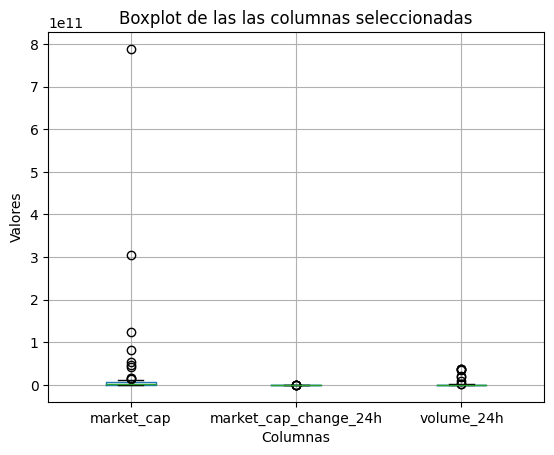

In [15]:
# Se averigua datos outliers para las variables cualitativas, se crea boxplot para las columnas de interés.

columnas = ['market_cap','market_cap_change_24h','volume_24h']

df[columnas].boxplot()

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Boxplot de las las columnas seleccionadas')

plt.show()

In [16]:
# Método de rango intercuartílico o IQR (método de Tukey's fences)
# Calcular los límites para los outliers
Q1 = df['market_cap'].quantile(0.25)
Q3 = df['market_cap'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['market_cap'] < limite_inferior) | (df['market_cap'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros', cantidad)
print(outliers)

cantidad de registros 10
   Unnamed: 0                              id                          name  \
0           0                         layer-1                  Layer 1 (L1)   
1           1         smart-contract-platform       Smart Contract Platform   
2           2                     stablecoins                   Stablecoins   
3           3          alleged-sec-securities        Alleged SEC Securities   
4           4           exchange-based-tokens         Exchange-based Tokens   
5           5  centralized-exchange-token-cex    Centralized Exchange (CEX)   
6           6      decentralized-finance-defi  Decentralized Finance (DeFi)   
7           7           liquid-staking-tokens         Liquid Staking Tokens   
8           8                      meme-token                          Meme   
9           9                 eth-2-0-staking               Eth 2.0 Staking   

     market_cap  market_cap_change_24h  \
0  7.889016e+11              -1.406792   
1  3.051210e+11      

In [17]:
#  'market_cap_change_24h'
# Calcular los límites para los outliers
Q1 = df['market_cap_change_24h'].quantile(0.25)
Q3 = df['market_cap_change_24h'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['market_cap_change_24h'] < limite_inferior) | (df['market_cap_change_24h'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros para market_cap', cantidad)
print(outliers)

cantidad de registros para market_cap 5
    Unnamed: 0                 id                   name    market_cap  \
45          45           gambling               Gambling  7.305410e+08   
57          57      telegram-bots          Telegram Bots  2.066119e+08   
58          58  guild-scholarship  Guild and Scholarship  2.009463e+08   
63          63            tourism                Tourism  8.440796e+07   
66          66       discord-bots           Discord Bots  5.381165e+07   

    market_cap_change_24h                                            content  \
45              12.926994                                                NaN   
57              -7.393428                                                NaN   
58             -12.281712  Guilds are decentralized autonomous organizati...   
63              -7.107294                                                NaN   
66              -6.749128                                                NaN   

                                  

In [18]:
# volume_24h
# # Calcular los límites para los outliers
Q1 = df['volume_24h'].quantile(0.25)
Q3 = df['volume_24h'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['volume_24h'] < limite_inferior) | (df['volume_24h'] > limite_superior)]
cantidad = len(outliers)
print('cantidad de registros para fully_diluted_valuation', cantidad)
print(outliers)

cantidad de registros para fully_diluted_valuation 9
     Unnamed: 0                          id                          name  \
0             0                     layer-1                  Layer 1 (L1)   
1             1     smart-contract-platform       Smart Contract Platform   
2             2                 stablecoins                   Stablecoins   
3             3      alleged-sec-securities        Alleged SEC Securities   
6             6  decentralized-finance-defi  Decentralized Finance (DeFi)   
11           11     non-fungible-tokens-nft                           NFT   
26           26             finance-banking             Finance / Banking   
28           28         asset-backed-tokens           Asset-backed Tokens   
109         109                 aave-tokens                   Aave Tokens   

       market_cap  market_cap_change_24h  \
0    7.889016e+11              -1.406792   
1    3.051210e+11              -1.409583   
2    1.242245e+11               0.181809   


Haber hallado estos datos atìpicos con el metodo de de Tukey's fences, no significan error en estos registros, simplemente que estos valores estan más alejados del conunto de datos.

Ahora se ve la dependencia y correlación entre variables

In [23]:
variables = df[['market_cap_change_24h', 'volume_24h']]

# Matriz de correlación
correlation_matrix = variables.corr()

print(correlation_matrix)

                       market_cap_change_24h  volume_24h
market_cap_change_24h               1.000000    0.061216
volume_24h                          0.061216    1.000000
